In [4]:
import random
import numpy as np

import initialization
import evaluation
import parent_selection
import crossover
import survivor_selection
import environment
import mutation

import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
class BinsEA:

    def __init__(self, bin_info=environment.BinInfo('../datasets/BinLocations_Medium.csv', '../datasets/BinDistances_Medium.csv'), 
                 pop_size=120, mating_pool_size=80, tournament_size=20, crossover_rate=0.3, mut_rate=0.8, max_gen=3000, target=12, crossover_type=0, eval_type=0):
        
        self.crossover_type=crossover_type
        self.eval_type=eval_type
        self.bin_info=bin_info
        self.pop_size=pop_size
        self.mating_pool_size=mating_pool_size
        self.tournament_size=tournament_size
        self.crossover_rate=crossover_rate
        self.mut_rate=mut_rate
        self.max_gen=max_gen
        self.target=target

    def get_output(self, display=True):

        bin_count = len(self.bin_info.bins)
        #List of the average route length for each generation
        avg_dist = []

        # Initialization
        population = initialization.pop_init(self.pop_size, self.bin_info, bin_count)
        fitness = [] # Fitness ranges from 0 to bin_count
        for i in population:
            fitness.append(evaluation.fitness(i, self.bin_info, self.eval_type))
        gen = 0
        og_fitness = fitness.copy()
        # Main Evolutionary Loop
        while (gen < self.max_gen and max(fitness) < self.target):

            parents = parent_selection.tournament_select(population, fitness, self.mating_pool_size, self.tournament_size)
            random.shuffle(parents)
            offspring = []
            offspring_fitness = []
            
            i=0
            while len(offspring) < self.mating_pool_size - 1:
                # PMX is used to create 2 offspring at a time
                if self.crossover_type == 0 :
                    off = crossover.crossover_main(population[parents[i]], population[parents[i+1]], self.crossover_rate, 0)
                    # Performs inversion mutation on offspring
                    off1 = mutation.inv_mut(off[0],self.mut_rate)
                    off2 = mutation.inv_mut(off[1],self.mut_rate)
                    offspring.append(off1)
                    offspring.append(off2)
                    offspring_fitness.append(evaluation.fitness(off1,self.bin_info,self.eval_type))
                    offspring_fitness.append(evaluation.fitness(off2,self.bin_info,self.eval_type))
                    i += 2
                # Edge Crossover is used to create 1 offspring at a time
                else: 
                    off = crossover.crossover_main(population[parents[i]], population[parents[i+1]], self.crossover_rate, 1)
                    off = mutation.inv_mut(off,self.mut_rate)
                    offspring.append(off)
                    offspring_fitness.append(evaluation.fitness(off,self.bin_info,self.eval_type))
                    i += 1

            population, fitness = survivor_selection.mu_plus_lambda(population, fitness, offspring, offspring_fitness)
            if(display):
                print("gen: ",gen," - max fit: ",max(fitness)," - pop size: ", len(population))
            avg_dist.append(len(population[0]) / (sum(fitness)/len(fitness)))
            gen += 1

        return population, fitness, og_fitness, gen, avg_dist

In [18]:
bin_info = environment.BinInfo('../datasets/BinLocations_Medium.csv', '../datasets/BinDistances_Medium.csv')

pop_size = 120
# Mating pool size must be even
mating_pool_size = 80 
tournament_size = 20
crossover_rate = 0.3
mut_rate = 0.7

max_gen = 3000
target_fitness = 12
crossover_type = 0 # 0: PMX, 1: Edge Crossover
eval_type = 0 # 0: Uses long/lat, 1: uses long/lat and direction

gen_count = 0
model = BinsEA(bin_info, pop_size, mating_pool_size, tournament_size, crossover_rate, mut_rate, max_gen, target_fitness, crossover_type, eval_type)
population, fitness, fitness_o, gen_count, avg_dist = model.get_output()
route = population[fitness.index(max(fitness))]
route_distance = 0
for bin in range(len(route)-1):
        route_distance += bin_info.get_dist(route[bin], route[bin+1])

gen:  0  - max fit:  1.321168796315316  - pop size:  120
gen:  1  - max fit:  1.321168796315316  - pop size:  120
gen:  2  - max fit:  1.321168796315316  - pop size:  120
gen:  3  - max fit:  1.3239192725834124  - pop size:  120
gen:  4  - max fit:  1.3368181185203225  - pop size:  120
gen:  5  - max fit:  1.3561277965885818  - pop size:  120
gen:  6  - max fit:  1.3705367935714123  - pop size:  120
gen:  7  - max fit:  1.3994485123627485  - pop size:  120
gen:  8  - max fit:  1.413770460616788  - pop size:  120
gen:  9  - max fit:  1.413770460616788  - pop size:  120
gen:  10  - max fit:  1.462405761787251  - pop size:  120
gen:  11  - max fit:  1.462405761787251  - pop size:  120
gen:  12  - max fit:  1.462405761787251  - pop size:  120
gen:  13  - max fit:  1.4834869524677723  - pop size:  120
gen:  14  - max fit:  1.4995444338662651  - pop size:  120
gen:  15  - max fit:  1.5228716001050255  - pop size:  120
gen:  16  - max fit:  1.5228716001050255  - pop size:  120
gen:  17  - max

#### Basic Summary

Best Individual: [73, 45, 27, 7, 79, 50, 58, 37, 61, 84, 56, 64, 59, 22, 71, 67, 2, 55, 31, 52, 44, 24, 85, 9, 69, 4, 41, 87, 75, 29, 15, 30, 16, 39, 53, 89, 86, 42, 20, 34, 40, 47, 10, False, 48, 5, 63, 76, 13, 25, 43, 18, 32, 60, 78, 35, 33, 54, 3, 88, 83, 74, 70, 12, 1, 26, 21, 62, 72, 66, 23, 14, 46, 81, 38, 8, 65, 51, 68, 77, 6, 49, 80, 36, 28, 82, 57, 11, 17, 19, 95, 99, 96, 90, 94, 92, 93, 91, 97, 98]
Best Fitness: 11.449407887895457     Target Fitness: 12
Best Route Length: 8.73 KM

Average Improvement Per Generation: 0.31 % Fitness Increase
Generations to Terminate: 3000
Max Generations Allowed 3000 



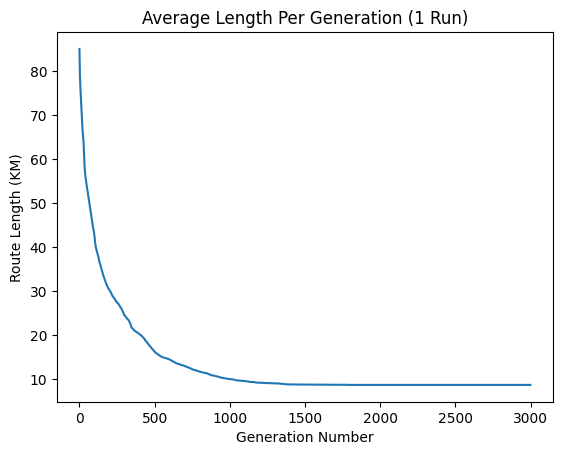

In [19]:
""" Displays information relevant to the output of the EA.
"""

print("Best Individual:", route)
print("Best Fitness:", evaluation.fitness(route, bin_info, model.eval_type), "    Target Fitness:", target_fitness)
print("Best Route Length:", round(route_distance, 2),"KM\n")

try:
    fitness_increase = ((sum(fitness) - sum(fitness_o)) / sum(fitness_o))/gen_count
except ZeroDivisionError:
    fitness_increase = 0.0
    
print("Average Improvement Per Generation:",round(fitness_increase*100,2),"% Fitness Increase")
print("Generations to Terminate:", gen_count)
print("Max Generations Allowed", max_gen, "\n")

dist_map = pd.DataFrame({"length": avg_dist})
if(gen_count > 0):
    plt1=sb.lineplot(x=dist_map.index, y='length', data=dist_map).set(title="Average Length Per Generation (1 Run)", xlabel='Generation Number', ylabel="Route Length (KM)")
    plt.show()

### Route Visualization

C:\Users\Lucas\AppData\Local\Temp\ipykernel_26776\3828348869.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-go" (-> color='g'). The keyword argument will take precedence.
  ax.plot(longitudes, latitudes, '-go', color='black', linewidth=1)


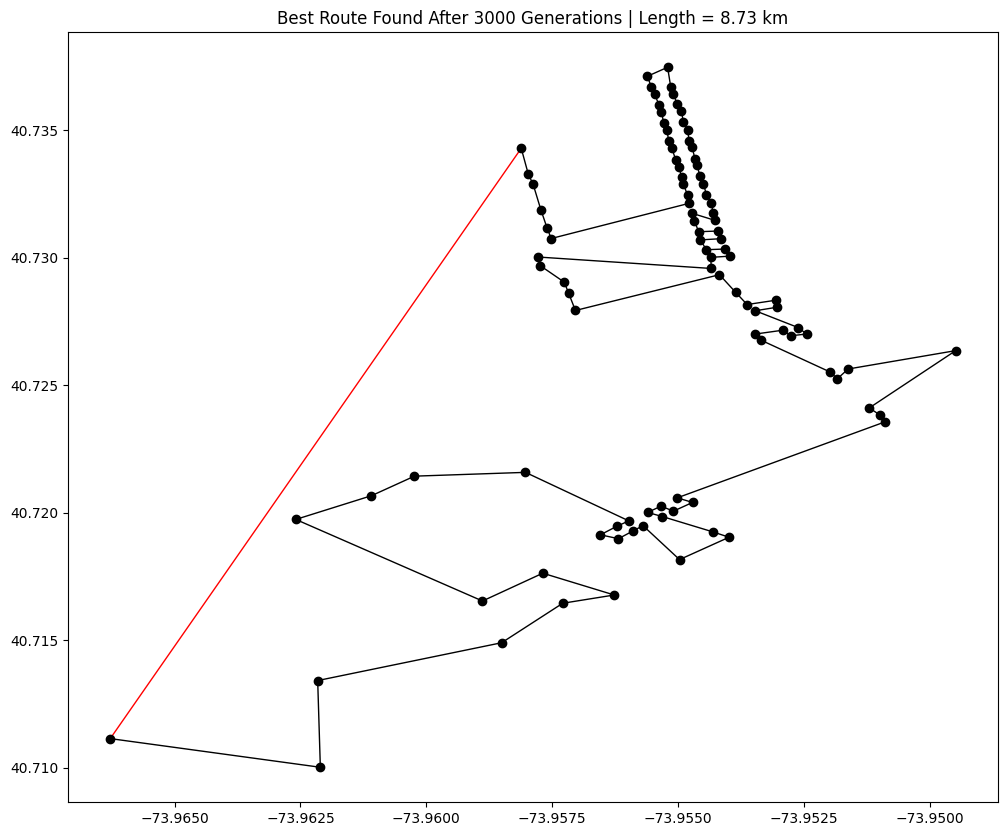

In [20]:
""" Plots the best route with Longitude on the x-axis and Latitude on the y-axis.
Each pair of adjacent bins in an individual are connected via a line.
"""
latitudes = []
longitudes = []
for bin in route:
    lat, lon = bin_info.get_coord(bin)
    latitudes.append(lat)
    longitudes.append(lon)  
    
plt_route, ax = plt.subplots()
ax.plot([longitudes[-1], longitudes[0]], [latitudes[-1], latitudes[0]], color='red', linewidth=1)    
ax.plot(longitudes, latitudes, '-go', color='black', linewidth=1)    
plt.title(label=("Best Route Found After " +  str(gen_count) +  " Generations | Length = " + str(round(route_distance,2)) + " km"))

plt_route.set_size_inches(12, 10)    
plt.show()

### Statistical Information

In [13]:
import statistics as st
from scipy.stats import norm
import time

bin_info = environment.BinInfo('../datasets/BinLocations_Small.csv', '../datasets/BinDistances_Small.csv')

distances_pmx = []
distances_ex= []
fitness_increase_pmx = []
fitness_increase_ex = []
terminate_pmx = []
terminate_ex = []

rep = 100 # Amount of times to run model
max_gen = 250
og_time = time.time()

# Runs model using PMX
for _ in range(rep):
    model = BinsEA(bin_info, 120, 80, 20, 0.3, 0.7, max_gen, 5, 0)
    population, fitness, fitness_o, gen_count, _ = model.get_output(display=False)
    terminate_pmx.append(gen_count)
    route = population[fitness.index(max(fitness))]
    dist = 0
    for bin in range(len(route)-1):
        dist += bin_info.get_dist(route[bin], route[bin+1])
    distances_pmx.append(dist)
    fitness_increase_pmx.append(((sum(fitness) - sum(fitness_o)) / sum(fitness_o))/gen_count)

pmx_time = time.time()

# Runs model using Edge Crossover
for _ in range(rep):
    model = BinsEA(bin_info, 120, 80, 20, 0.3, 0.7, max_gen, 5, 1)
    population, fitness, fitness_o, gen_count, _ = model.get_output(display=False)
    terminate_ex.append(gen_count)
    route = population[fitness.index(max(fitness))]
    dist = 0
    for bin in range(len(route)-1):
        dist += bin_info.get_dist(route[bin], route[bin+1])
    distances_ex.append(dist)
    fitness_increase_ex.append(((sum(fitness) - sum(fitness_o)) / sum(fitness_o))/gen_count)

print("\nTime taken to run EA", rep, "times with PMX:", round(pmx_time - og_time, 2), "seconds")
print("Time taken to run EA", rep, "times with Edge:", round(time.time() - pmx_time, 2), "seconds", "\n")

print("PMX - Small Dataset\n")

mean = st.mean(distances_pmx)
dev = st.stdev(distances_pmx)
print("Mean Distance:", mean, "km")
print("Standard Deviation:", dev, "km")
print("Maximum Distance:", max(distances_pmx), "km | Minimum Distance:", min(distances_pmx), "km\n")

mean = st.mean(fitness_increase_pmx)
dev = st.stdev(fitness_increase_pmx)
print("Mean Fitness Increase per Generation:", mean*100, "%")

mean = st.mean(terminate_pmx)
print("Average generations to terminate (max =", max_gen, "):", mean)


print("\nEdge - Small Dataset\n")

mean = st.mean(distances_ex)
dev = st.stdev(distances_ex)
print("Mean Distance:", mean)
print("Standard Deviation:", dev)
print("Maximum Distance:", max(distances_ex), "km | Minimum Distance:", min(distances_ex), "km\n")

mean = st.mean(fitness_increase_ex)
print("Mean Fitness Increase per Generation:", mean*100, "%")

mean = st.mean(terminate_ex)
print("Average generations to terminate (max =", max_gen, "):", mean)


Time taken to run EA 100 times with PMX: 16.2 seconds
Time taken to run EA 100 times with Edge: 24.02 seconds 

PMX - Small Dataset

Mean Distance: 2.89809347871451 km
Standard Deviation: 0.08314451537878778 km
Maximum Distance: 2.998098810685666 km | Minimum Distance: 2.673449638733703 km

Mean Fitness Increase per Generation: 5.4639518294205605 %
Average generations to terminate (max = 250 ): 39.13

Edge - Small Dataset

Mean Distance: 2.8964174743527797
Standard Deviation: 0.08242942778432474
Maximum Distance: 2.9988513654909057 km | Minimum Distance: 2.664502396435469 km

Mean Fitness Increase per Generation: 4.71615206402707 %
Average generations to terminate (max = 250 ): 46.99


#### SHAP Results

In [44]:
import shap
import shap.maskers
import copy

bin_info = environment.BinInfo('../datasets/BinLocations_Small.csv', '../datasets/BinDistances_Small.csv')

# Given a subset of Location data, runs the EA and returns the best route found.
def shap_runner(input_info):
    bin_copy = copy.deepcopy(bin_info)
    bin_copy.bins = input_info.tolist()

    model = BinsEA(bin_info=bin_copy, max_gen=250, eval_type=1)
    population, fitness, _, _, _ = model.get_output(display=False)

    return np.array(population[fitness.index(max(fitness))])

input_info = copy.deepcopy(bin_info.bins)
for c in input_info:
    del c[2]
    del c[1]
input_info = np.array(input_info)
output_info = np.array(route)
masker = shap.maskers.Independent(data=input_info[:2])
explainer = shap.PermutationExplainer(shap_runner, masker=masker)
shap_vals = explainer(input_info)

PermutationExplainer explainer: 16it [17:26, 69.77s/it]                        


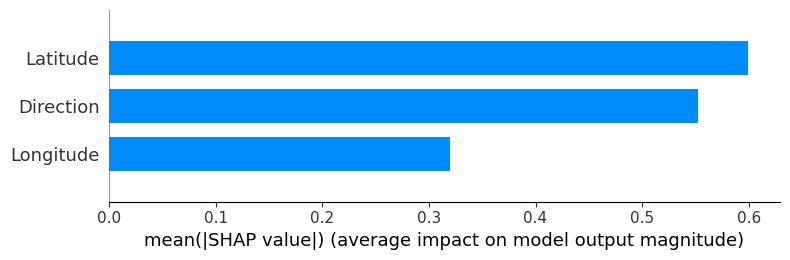

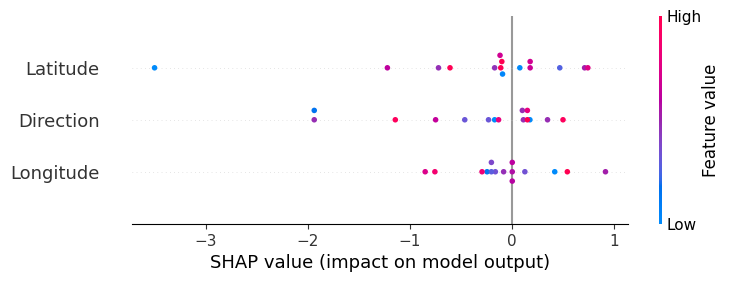

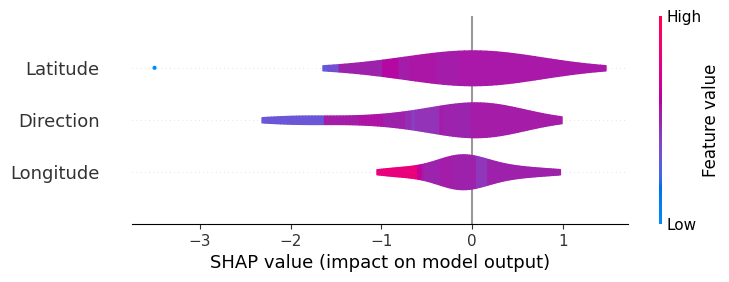

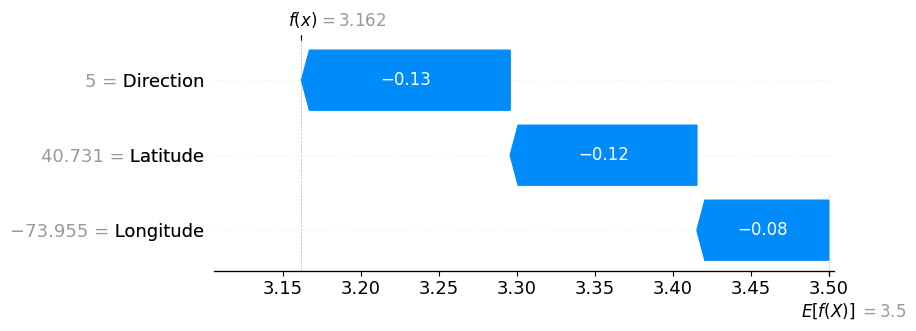

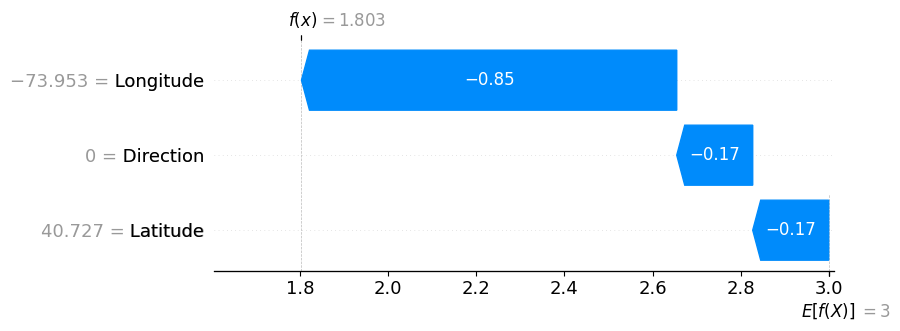

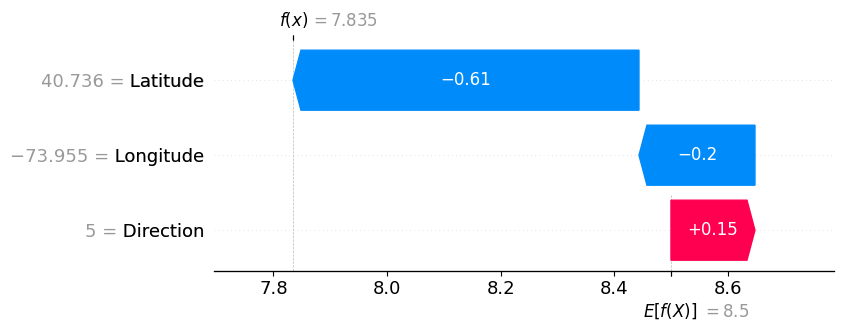

In [45]:
shap_vals.feature_names = ["Direction", "Latitude", "Longitude"]
shap.summary_plot(shap_values=shap_vals, plot_type='bar')
shap.plots.beeswarm(shap_vals)
shap.plots.violin(shap_vals)
shap.plots.waterfall(shap_values=shap_vals[0])
shap.plots.waterfall(shap_values=shap_vals[1])
shap.plots.waterfall(shap_values=shap_vals[2])

#### DiCE Results

In [2]:

import dice_ml
from dice_ml.utils import helpers
from sklearn.model_selection import train_test_split

dataset = copy.deepcopy(bin_info.bins)
for row in range(len(dataset)):
    dataset[row].append(route.index(row))
cols = copy.deepcopy(bin_info.headers)
cols.append("route_pos")
bin_data = pd.DataFrame(dataset, columns=cols)
bin_data = bin_data.drop(["streetname1","streetname2"],axis=1)
target = bin_data["route_pos"]
train, test, _, _ = train_test_split(bin_data, target, test_size=0.2, random_state=0)


d = dice_ml.Data(dataframe=train, continuous_features=['point_latitude', 'point_longitude'], outcome_name='route_pos')
m = dice_ml.Model(model=BinsEA, backend='TF2', func='ohe-min-max')
exp = dice_ml.Dice(d,m)

query_instance = test.drop(columns="route_pos")[0:1]

dice_exp = exp.generate_counterfactuals(query_instance, 4, "opposite")
dice_exp.visualize_as_dataframe()


NameError: name 'bin_info' is not defined

#### ALE Results

array([[<Axes: xlabel='Direction', ylabel='ALE'>,
        <Axes: xlabel='Latitude', ylabel='ALE'>,
        <Axes: xlabel='Longitude', ylabel='ALE'>]], dtype=object)

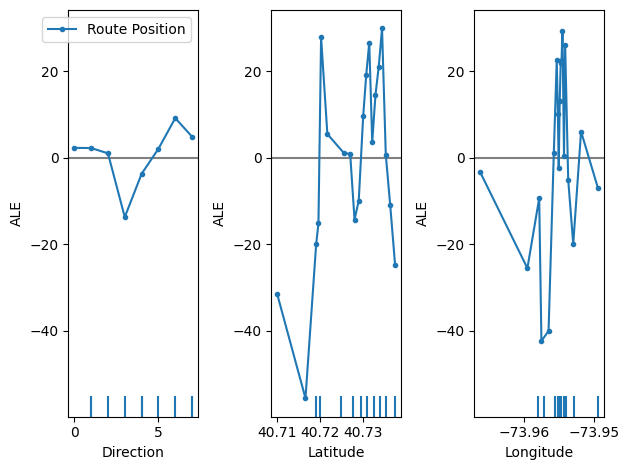

In [48]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale
import copy

bin_info = environment.BinInfo('../datasets/BinLocations_Medium.csv', '../datasets/BinDistances_Medium.csv')

# Runs EA using input_info, returns best route found.
def ale_runner(input_info):
    bin_copy = copy.deepcopy(bin_info)
    bin_copy.bins = input_info.tolist()
    model = BinsEA(bin_info=bin_copy, max_gen=3500, eval_type=1)
    population, fitness, _, _, _ = model.get_output(display=False)
    return np.array(population[fitness.index(max(fitness))])

input_info = copy.deepcopy(bin_info.bins)
for c in input_info:
    del c[2]
    del c[1]
input_info = np.array(input_info)
ale = ALE(ale_runner, feature_names=["Direction", "Latitude", "Longitude"], target_names=["Route Position"])
exp = ALE.explain(ale, X=input_info)
plot_ale(exp)
